# Feature Engineering - Churn

Business Problem: A machine learning model will develop for predict the customers who churn the company. Before the develop the model, we need some preprocessing and feature engineering consepts for better predictions.

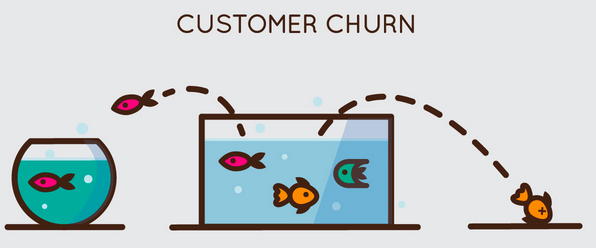

## About Dataset

Telco churn data includes information about a telecom company that provided home phone and Internet services to 7,043 customers in California in the third quarter. It shows which customers have left, stayed or signed up for their service.

Variables:

CustomerId<br> 
Gender<br> 
SeniorCitizen: Is customer elderly or not? (1, 0)<br> 
Partner: Has customer partner? (Yes, No)
Dependents: Whether the customer has dependents (Yes, No)<br> 
tenure: Total month of the customer in the company <br> 
PhoneService: Whether customer has phone service (Yes, No)<br> 
MultipleLines: Whether customer has more than one line service (Yes, No, No Phone Service)<br> 
InternetService: Customer's internet service provider (DSL, Fiber optic, No)<br> 
OnlineSecurity: Whether the customer has online security (Yes, No, No Internet service)<br> 
OnlineBackup: Whether the customer has an online backup (Yes, No, No Internet service)<br> 
DeviceProtection: Whether the customer has device protection (Yes, No, No Internet service)<br> 
TechSupport: Whether the customer has technical support (Yes, No, No Internet service)<br> 
StreamingTV: Whether the customer has streaming TV (Yes, No, No Internet service)<br> 
StreamingMovies: Whether the customer has streaming movies (Yes, No, No Internet service)<br> 
Contract: Customer's contact duration (Month to month, One year, Two years)<br> 
PaperlessBilling: Whether the customer has paperless bill (Yes, No)<br> 
PaymentMethod: Customer payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))<br> 
MonthlyCharges: Customer monthly charge<br> 
TotalCharges: Customer total charge<br> 
Churn: Whether the customer churn (Yes, No)<br> 

___

**Import Libraries**

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

**Read csv file**

In [449]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [450]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

### Step 1: Basic exploratory

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Check missing values**

In [452]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Unique values**

In [453]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**Describe**

In [454]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


###  Step 2: Catch the numerical and categorical variables

In [455]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [456]:
def grab_col_names_2(dataframe, cat_th=10, car_th=20):


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'Categorical Variables: {len(cat_cols)}')
    print(f'Numerical Variables: {len(num_cols)}')
    print(f'Numerical But Categorical Variables: {len(num_but_cat)}')
    print(f'Categorical But Cardinal: {len(cat_but_car)}')
    
    return cat_cols, num_cols, cat_but_car

In [457]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=20)

Observations: 7043
Variables: 21
Categorical Variables: 17
Numerical Variables: 2
Numerical But Categorical Variables: 1
Categorical But Cardinal: 2


In [458]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [459]:
num_cols

['tenure', 'MonthlyCharges']

In [460]:
cat_but_car

['customerID', 'TotalCharges']

In [461]:
df['TotalCharges'].dtype

dtype('O')

In [462]:
# df['TotalCharges'].astype("float64")

In [463]:
df[df['TotalCharges'].str.isspace()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [464]:
empty_total_charges = df[df['TotalCharges'].str.isspace()].index.to_list()
empty_total_charges

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [465]:
df.loc[df['TotalCharges'].str.isspace(), 'TotalCharges'] = 'NaN'

In [466]:
df[df['TotalCharges'].index.isin(empty_total_charges)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [467]:
df['TotalCharges'] = df['TotalCharges'].astype("float64")

In [468]:
cat_but_car.remove('TotalCharges')

In [469]:
cat_but_car

['customerID']

In [470]:
num_cols.append('TotalCharges')

In [471]:
print('Numerical Variables:', num_cols, '\n')
print('Categorical Variables:', cat_cols, '\n')
print('Cardinal Variables:', cat_but_car, '\n')

Numerical Variables: ['tenure', 'MonthlyCharges', 'TotalCharges'] 

Categorical Variables: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'] 

Cardinal Variables: ['customerID'] 



### Step 3: Analyze the numerical and categorical variables

**Summarize the numerical variables**

In [472]:
def num_summary(dataframe, numerical_col, plot=False):
    print(numerical_col.upper())
    quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        sns.histplot(data=dataframe, x=numerical_col)
        plt.title(numerical_col)
        plt.xlabel(numerical_col)
        plt.show()
       
    print('################################################################\n')

TENURE
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
max        72.000000
Name: tenure, dtype: float64


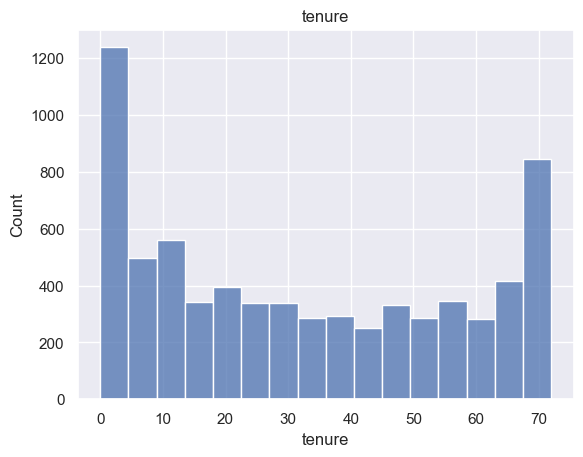

################################################################

MONTHLYCHARGES
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
max       118.750000
Name: MonthlyCharges, dtype: float64


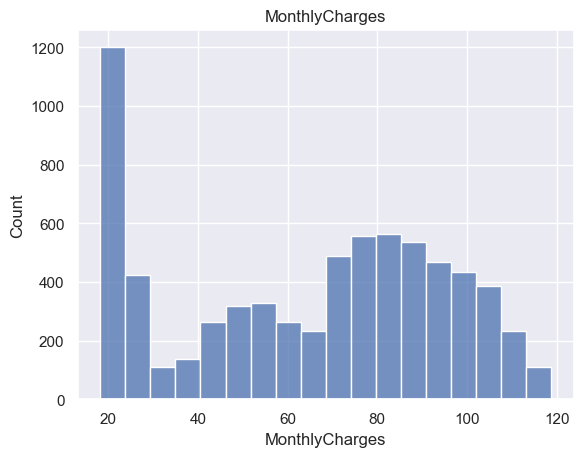

################################################################

TOTALCHARGES
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
max      8684.800000
Name: TotalCharges, dtype: float64


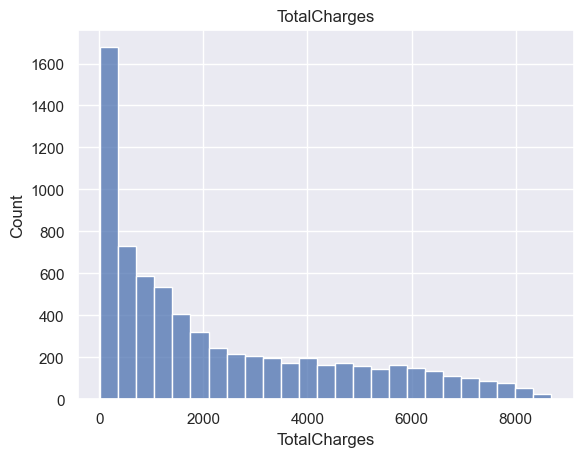

################################################################



In [473]:
for col in num_cols:
    num_summary(df, col, plot=True)

**Summarize the categorical variables**

In [474]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio': round(100*(dataframe[col_name].value_counts()) / len(dataframe), 2)}))
    
    if plot:
        plt.figure(figsize=(5,3))
        sns.countplot(x=col_name, data=dataframe)
        plt.xticks(rotation=90)
        plt.show()
        
    print('######################################################################\n')

        gender  Ratio
Male      3555  50.48
Female    3488  49.52


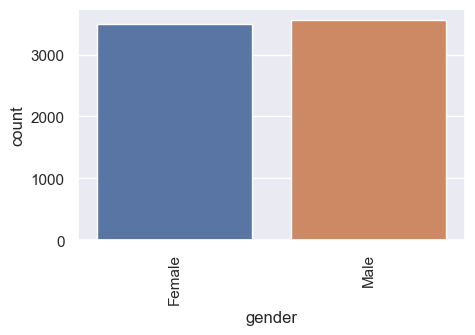

######################################################################

     Partner  Ratio
No      3641   51.7
Yes     3402   48.3


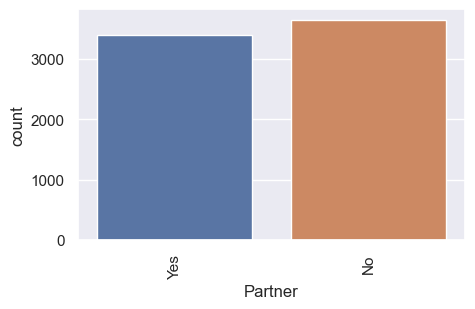

######################################################################

     Dependents  Ratio
No         4933  70.04
Yes        2110  29.96


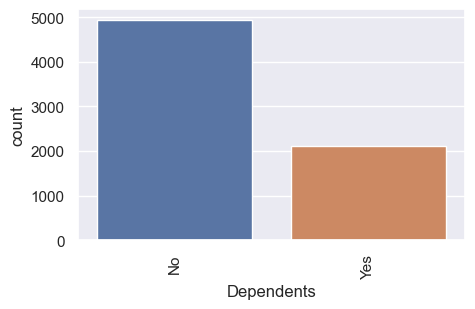

######################################################################

     PhoneService  Ratio
Yes          6361  90.32
No            682   9.68


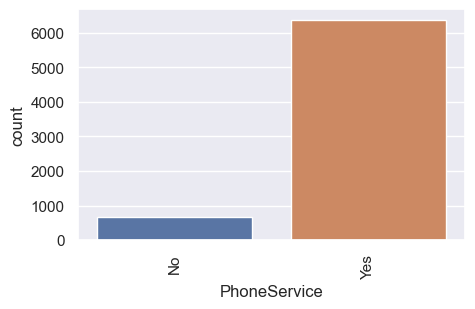

######################################################################

                  MultipleLines  Ratio
No                         3390  48.13
Yes                        2971  42.18
No phone service            682   9.68


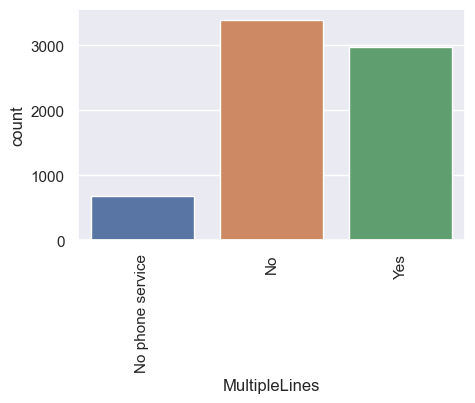

######################################################################

             InternetService  Ratio
Fiber optic             3096  43.96
DSL                     2421  34.37
No                      1526  21.67


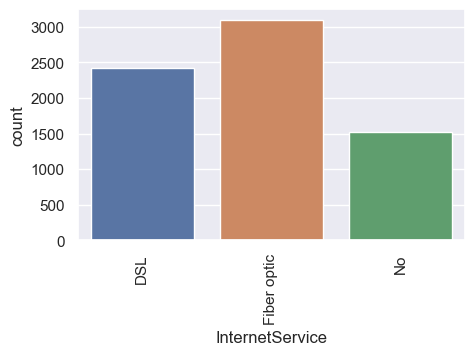

######################################################################

                     OnlineSecurity  Ratio
No                             3498  49.67
Yes                            2019  28.67
No internet service            1526  21.67


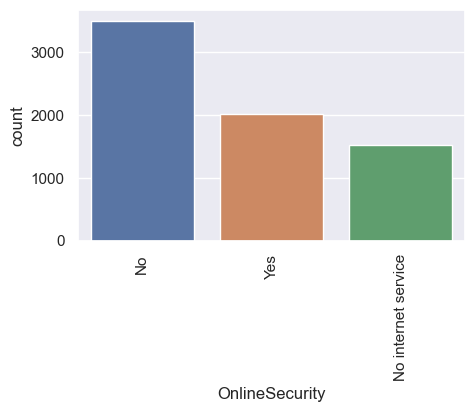

######################################################################

                     OnlineBackup  Ratio
No                           3088  43.84
Yes                          2429  34.49
No internet service          1526  21.67


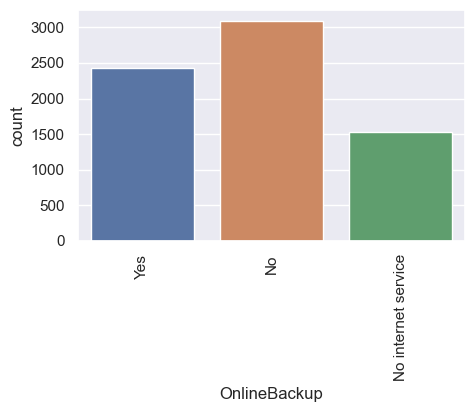

######################################################################

                     DeviceProtection  Ratio
No                               3095  43.94
Yes                              2422  34.39
No internet service              1526  21.67


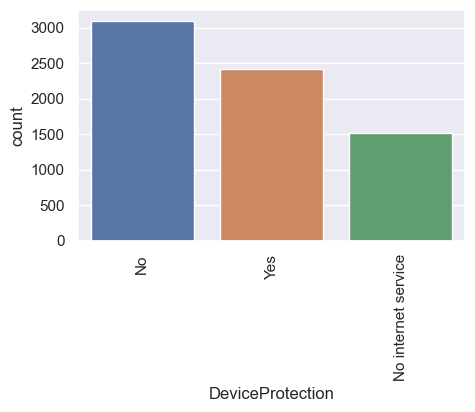

######################################################################

                     TechSupport  Ratio
No                          3473  49.31
Yes                         2044  29.02
No internet service         1526  21.67


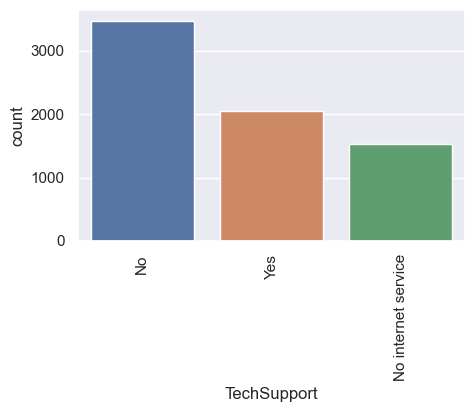

######################################################################

                     StreamingTV  Ratio
No                          2810  39.90
Yes                         2707  38.44
No internet service         1526  21.67


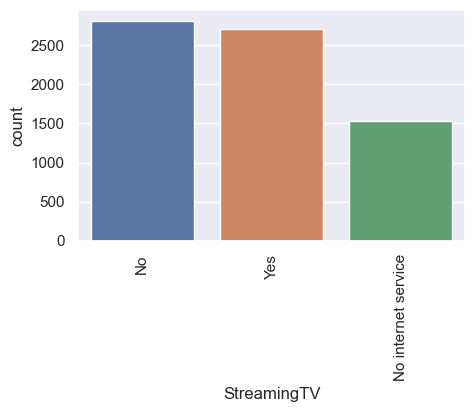

######################################################################

                     StreamingMovies  Ratio
No                              2785  39.54
Yes                             2732  38.79
No internet service             1526  21.67


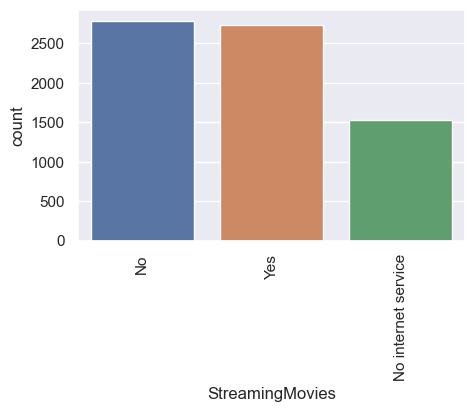

######################################################################

                Contract  Ratio
Month-to-month      3875  55.02
Two year            1695  24.07
One year            1473  20.91


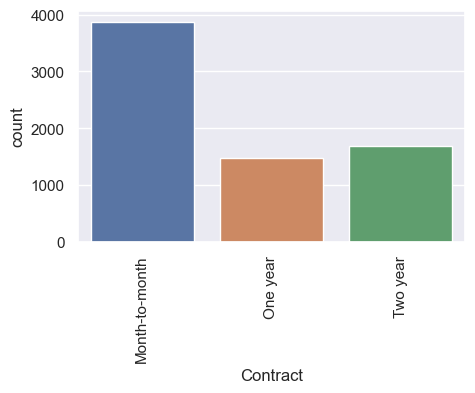

######################################################################

     PaperlessBilling  Ratio
Yes              4171  59.22
No               2872  40.78


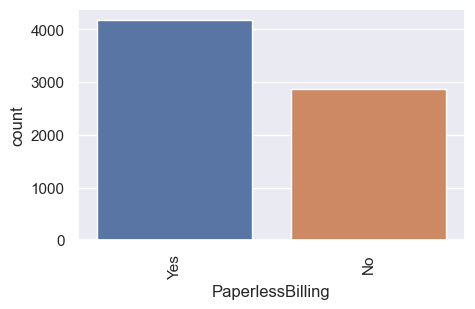

######################################################################

                           PaymentMethod  Ratio
Electronic check                    2365  33.58
Mailed check                        1612  22.89
Bank transfer (automatic)           1544  21.92
Credit card (automatic)             1522  21.61


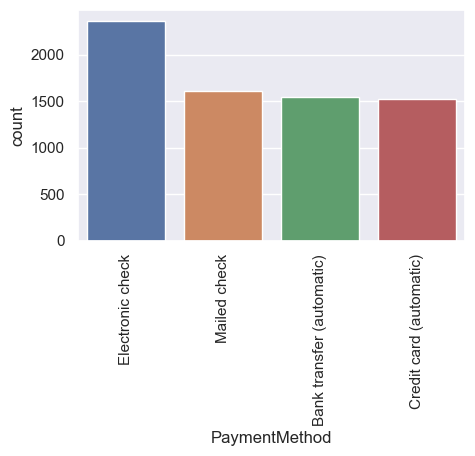

######################################################################

     Churn  Ratio
No    5174  73.46
Yes   1869  26.54


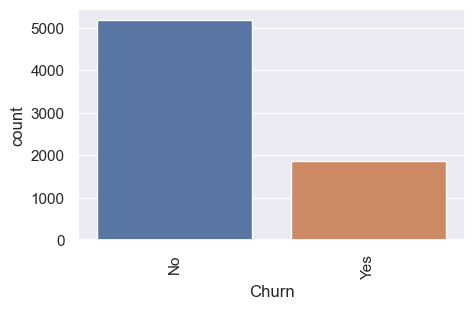

######################################################################

   SeniorCitizen  Ratio
0           5901  83.79
1           1142  16.21


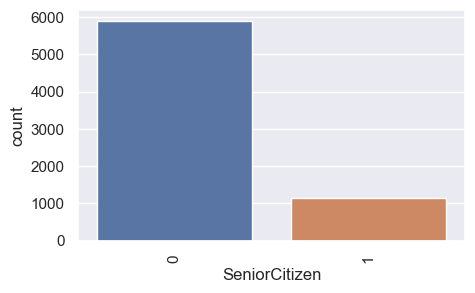

######################################################################



In [475]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

### Step 4: Target Variable Analysis

**Target summary with categorical variables**

In [476]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({'Target Mean': dataframe.groupby(categorical_col)[target].mean()}))
    print('################################################################\n')

In [477]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [478]:
df['Churn'] = pd.get_dummies(df['Churn'], drop_first=True)

In [479]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [480]:
for col in cat_cols:
    target_summary_with_cat(df, 'Churn', col)

        Target Mean
gender             
Female     0.269209
Male       0.261603
################################################################

         Target Mean
Partner             
No          0.329580
Yes         0.196649
################################################################

            Target Mean
Dependents             
No             0.312791
Yes            0.154502
################################################################

              Target Mean
PhoneService             
No               0.249267
Yes              0.267096
################################################################

                  Target Mean
MultipleLines                
No                   0.250442
No phone service     0.249267
Yes                  0.286099
################################################################

                 Target Mean
InternetService             
DSL                 0.189591
Fiber optic         0.418928
No                  0.074050
###########

**Target summary with numerical variables**

In [481]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: 'mean'}), '\n')
    print('################################################################\n')

In [482]:
for col in num_cols:
    target_summary_with_num(df, 'Churn', col)

          tenure
Churn           
0      37.569965
1      17.979133 

################################################################

       MonthlyCharges
Churn                
0           61.265124
1           74.441332 

################################################################

       TotalCharges
Churn              
0       2555.344141
1       1531.796094 

################################################################



### Step 5: Outlier Analysis

In [483]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [484]:
def outlier_threshold(dataframe, col_name, q1=0.25, q3=0.75):
    
    quartile_1 = dataframe[col_name].quantile(q1)
    quartile_3 = dataframe[col_name].quantile(q3)
    interquartile = quartile_3 - quartile_1
    low_limit = quartile_1 - 1.5 * interquartile
    up_limit = quartile_3 + 1.5 * interquartile
    
    return up_limit, low_limit

In [485]:
def check_outlier(dataframe, col_name):
    
    up_limit, low_limit = outlier_threshold(dataframe, col_name)
    
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [486]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


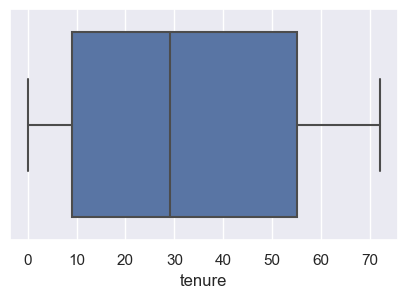

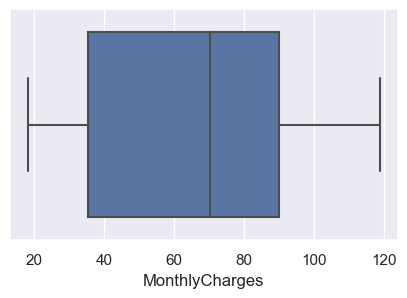

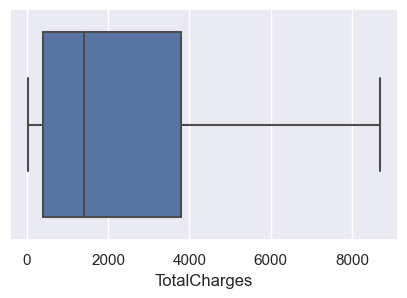

In [487]:
for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df, x=col)
    plt.show()

**Local Outlier Analysis**

In [488]:
clf = LocalOutlierFactor()

In [489]:
clf.fit_predict(df[num_cols].dropna())

array([-1,  1,  1, ...,  1,  1,  1])

In [490]:
df_scores = clf.negative_outlier_factor_
df_scores

array([-4.94086244, -1.01464629, -0.98844009, ..., -1.11042748,
       -1.00483387, -1.00066733])

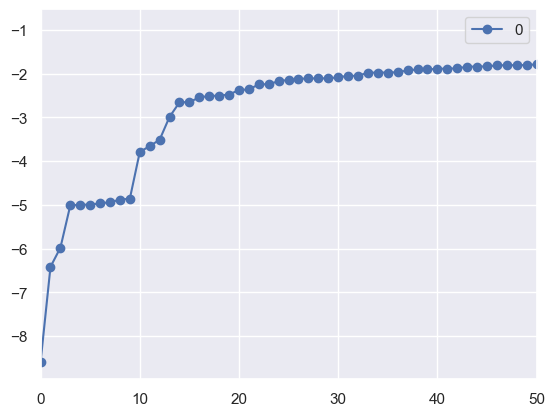

In [491]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(xlim=[0, 50], stacked=True, style='o-')
plt.show()

In [492]:
th = np.sort(df_scores)[4]
th

-5.000959306475733

In [493]:
df[num_cols].dropna()[df_scores < th]

,tenure,MonthlyCharges,TotalCharges
252,1,40.2,40.20
900,2,19.5,27.55
1282,1,62.8,62.80
4290,1,40.1,40.10


### Step 6: Missing Value Analysis

In [494]:
def missing_value_table(dataframe, na_name=False):
    
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio %'])
    print(missing_df)
    
    if na_name == True:
        return na_columns

In [495]:
df['TotalCharges'].isnull().sum() / df.shape[0]

0.001561834445548772

In [496]:
missing_value_table(df, na_name=False)

              n_miss  ratio %
TotalCharges      11     0.16


### Step 7: Correlation Analysis

In [497]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000


<AxesSubplot:>

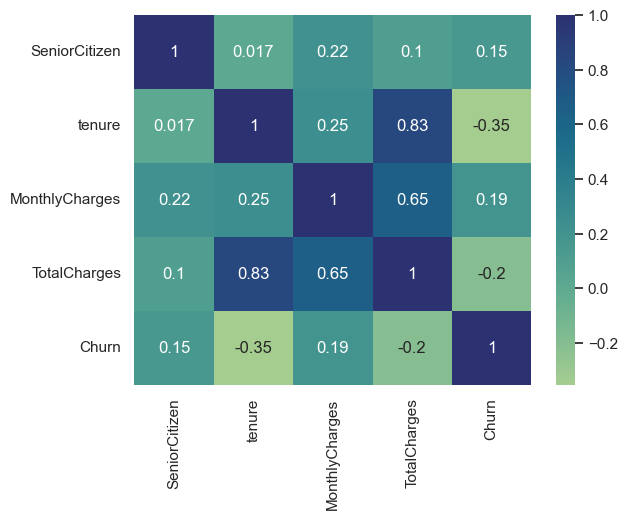

In [498]:
sns.heatmap(df.corr(), cmap='crest', annot=True)

## Feature Engineering

### Step 1: Outliers and Missing Values

In [499]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


In [500]:
df.shape

(7043, 21)

In [501]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [502]:
df = df.dropna()

### Step 2: Create new variables (Feature Extraction)

**New monthly charge**

In [503]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [504]:
df.loc[((df['gender'] == 'Female') & (df['SeniorCitizen'] == 0)), 'new_citizen'] = 'young_female'
df.loc[((df['gender'] == 'Female') & (df['SeniorCitizen'] == 1)), 'new_citizen'] = 'elder_female'
df.loc[((df['gender'] == 'Male') & (df['SeniorCitizen'] == 0)), 'new_citizen'] = 'young_male'
df.loc[((df['gender'] == 'Male') & (df['SeniorCitizen'] == 1)), 'new_citizen'] = 'elder_male'

In [505]:
df.loc[(df['tenure'] <= 12), 'new_tenure'] = 'new_customer'
df.loc[((df['tenure'] > 12) & (df['tenure'] <= 24)), 'new_tenure'] = 'standard_customer'
df.loc[((df['tenure'] > 24) & (df['tenure'] <= 36)), 'new_tenure'] = 'loyal_customer'
df.loc[(df['tenure'] > 36), 'new_tenure'] = 'champions'

In [506]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_citizen,new_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,young_female,new_customer
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,young_male,loyal_customer
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,young_male,new_customer
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,young_male,champions
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,young_female,new_customer


In [507]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_citizen,new_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,young_female,new_customer
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,young_male,loyal_customer
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,young_male,new_customer
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,young_male,champions
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,young_female,new_customer


In [508]:
df['new_citizen'].isnull().sum()

0

In [509]:
df['new_tenure'].isnull().sum()

0

In [510]:
df[df['InternetService'] == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_citizen,new_tenure
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,0,young_male,standard_customer
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,0,young_female,champions
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,0,young_male,new_customer
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1,young_male,new_customer
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0,young_male,new_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,0,young_female,champions
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,0,young_female,champions
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0,young_male,new_customer
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,0,young_female,new_customer


In [511]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_citizen,new_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,young_female,new_customer
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,young_male,loyal_customer
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,young_male,new_customer
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,young_male,champions
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,young_female,new_customer


**New monthly charge**

In [512]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [513]:
df['new_montly_charges'] = pd.qcut(df['MonthlyCharges'], 4, labels=['cheap', 'medium', 'expensive', 'platinum'])

In [514]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_citizen,new_tenure,new_montly_charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,young_female,new_customer,cheap
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,young_male,loyal_customer,medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,young_male,new_customer,medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,young_male,champions,medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,young_female,new_customer,expensive


In [515]:
df['new_montly_charges'].isnull().sum()

0

### Step 3: Encodings

**Binary Encoding**

In [516]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_citizen,new_tenure,new_montly_charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,young_female,new_customer,cheap
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,young_male,loyal_customer,medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,young_male,new_customer,medium
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,young_male,champions,medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,young_female,new_customer,expensive


In [517]:
binary_cols = [col for col in df.columns if ((df[col].dtype not in ['int64', 'float64']) and df[col].nunique() == 2)]
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [518]:
def label_encoder(dataframe, binary_col):
    
    le = LabelEncoder()
    dataframe[binary_col] = le.fit_transform(dataframe[binary_col])
    
    return dataframe

In [519]:
for col in binary_cols:
    label_encoder(df, col)

In [520]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,new_citizen,new_tenure,new_montly_charges
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,young_female,new_customer,cheap
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,young_male,loyal_customer,medium
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,young_male,new_customer,medium
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,young_male,champions,medium
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,young_female,new_customer,expensive


**One-Hot Encoding**

In [521]:
one_hot_cols = [col for col in df.columns if  10 >= df[col].nunique() > 2]
one_hot_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'new_citizen',
 'new_tenure',
 'new_montly_charges']

In [522]:
def one_hot_encoder(dataframe, one_hot_cols, drop_first=True):
    
    dataframe = pd.get_dummies(dataframe, columns=one_hot_cols, drop_first=drop_first)
    
    return dataframe

In [523]:
one_hot_encoder(df, one_hot_cols, drop_first=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,new_citizen_elder_male,new_citizen_young_female,new_citizen_young_male,new_tenure_loyal_customer,new_tenure_new_customer,new_tenure_standard_customer,new_montly_charges_medium,new_montly_charges_expensive,new_montly_charges_platinum
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0


In [524]:
df = one_hot_encoder(df, one_hot_cols, drop_first=True)

**Rare Encoding**

In [525]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 41
Categorical Variables: 37
Numerical Variables: 3
Numerical But Categorical Variables: 37
Categorical But Cardinal: 1


In [526]:
def rare_analyzer(dataframe, target, cat_cols):
    
    for col in cat_cols:
        print(col, ':', len(dataframe[col].value_counts()))
        print(pd.DataFrame({'COUNT': dataframe[col].value_counts(),
                           'RATIO': dataframe[col].value_counts() / len(dataframe),
                           'TARGET_MEAN': dataframe.groupby(col)[target].mean()}), end='\n\n\n')

In [527]:
rare_analyzer(df, 'Churn', cat_cols)

gender : 2
   COUNT     RATIO  TARGET_MEAN
0   3483  0.495307     0.269595
1   3549  0.504693     0.262046


SeniorCitizen : 2
   COUNT   RATIO  TARGET_MEAN
0   5890  0.8376     0.236503
1   1142  0.1624     0.416813


Partner : 2
   COUNT     RATIO  TARGET_MEAN
0   3639  0.517491     0.329761
1   3393  0.482509     0.197171


Dependents : 2
   COUNT     RATIO  TARGET_MEAN
0   4933  0.701507     0.312791
1   2099  0.298493     0.155312


PhoneService : 2
   COUNT     RATIO  TARGET_MEAN
0    680  0.096701     0.250000
1   6352  0.903299     0.267475


PaperlessBilling : 2
   COUNT     RATIO  TARGET_MEAN
0   2864  0.407281     0.163757
1   4168  0.592719     0.335893


Churn : 2
   COUNT     RATIO  TARGET_MEAN
0   5163  0.734215          0.0
1   1869  0.265785          1.0


MultipleLines_No phone service : 2
   COUNT     RATIO  TARGET_MEAN
0   6352  0.903299     0.267475
1    680  0.096701     0.250000


MultipleLines_Yes : 2
   COUNT     RATIO  TARGET_MEAN
0   4065  0.578072     0.2506

There is no ratio less than 0.01 so we dont need to rare encoding

### Step 4: Standardization Numerical Variables

In [528]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [529]:
rs = RobustScaler()

In [530]:
for col in num_cols:
    df[[col]] = rs.fit_transform(df[[col]])

In [531]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,new_citizen_elder_male,new_citizen_young_female,new_citizen_young_male,new_tenure_loyal_customer,new_tenure_new_customer,new_tenure_standard_customer,new_montly_charges_medium,new_montly_charges_expensive,new_montly_charges_platinum
0,7590-VHVEG,0,0,1,0,-0.608696,0,1,-0.746200,-0.403038,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,0.108696,1,0,-0.246891,0.145000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,-0.586957,1,1,-0.304007,-0.379963,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
3,7795-CFOCW,1,0,0,0,0.347826,0,0,-0.516813,0.130633,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,-0.586957,1,1,0.006449,-0.367144,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


### Step 5: Modeling

In [532]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=17)

In [534]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

In [535]:
y_predictions = rf_model.predict(X_test)

In [536]:
accuracy_score(y_predictions, y_test)

0.7856381087806612

**Feature Importance on Model**

In [537]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

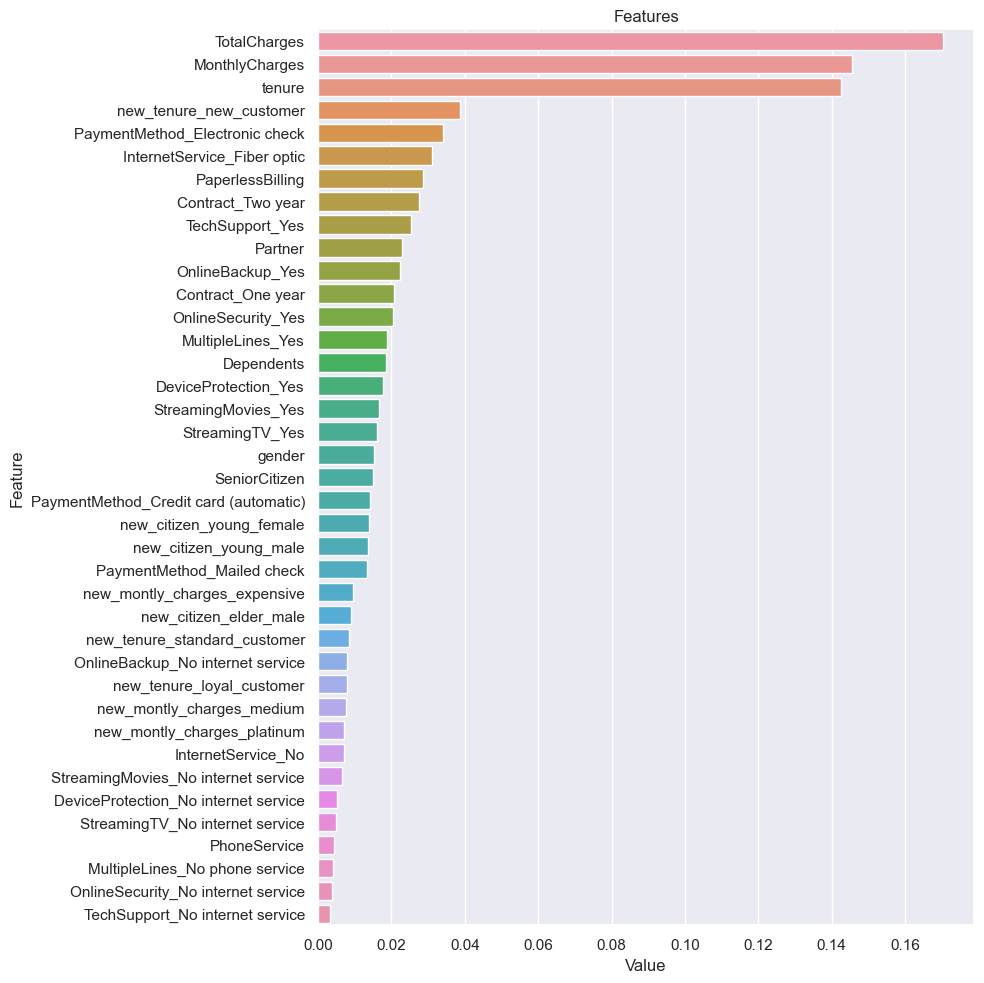

In [538]:
plot_importance(rf_model, X_train)